# Module 6–Supervised Learning -2

In [69]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns # this is used for the plot the graph
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm    		# To import the svm classifier

### Case Study I

In [70]:
voice_df = pd.read_csv('voice-classification.csv')
voice_df.head(6)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male


In [71]:
train, test = train_test_split(voice_df, test_size = 0.2)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(2534, 21)
(634, 21)


In [72]:
prediction_var = voice_df.columns
prediction_var = prediction_var.drop('label')
train1_X = train[prediction_var]# taking the training data input
train1_y= train['label']# This is output of our training data
test1_X= test[prediction_var] # taking test data inputs
test1_y =test['label']   #output value of test dat

In [73]:
gnb = GaussianNB()
y_pred_gnb = gnb.fit(train1_X, train1_y)
target_pred = y_pred_gnb.predict(test1_X)

cnf_matrix_gnb = confusion_matrix(test1_y, target_pred)
print(cnf_matrix_gnb)
print(metrics.accuracy_score(target_pred,test1_y)) # to check the accuracy
print("Number of mislabeled points out of a total %d points : %d"
%(voice_df.shape[0],(test1_y != target_pred).sum()))

[[297  38]
 [ 25 274]]
0.9006309148264984
Number of mislabeled points out of a total 3168 points : 63


### Case Study II - Naive Bayes

In [74]:
activity_df = pd.read_csv('run_or_walk.csv')
activity_df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [75]:
activity_df.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [76]:
train, test = train_test_split(activity_df, test_size = 0.3)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(62011, 11)
(26577, 11)


In [77]:
prediction_var = ['acceleration_x','acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']
train_X = train[prediction_var]# taking the training data input
train_y= train['activity']# This is output of our training data
test_X= test[prediction_var] # taking test data inputs
test_y =test['activity']   #output value of test dat

In [78]:
gnb = GaussianNB()
y_pred_gnb = gnb.fit(train_X, train_y)
target_pred = y_pred_gnb.predict(test_X)

print(metrics.accuracy_score(target_pred,test_y)) # to check the accuracy

0.9554878278210482


In [79]:
from sklearn.metrics import classification_report
print(classification_report(test_y, target_pred))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96     13393
          1       0.99      0.92      0.95     13184

avg / total       0.96      0.96      0.96     26577



In [80]:
prediction_var = ['acceleration_x','acceleration_y', 'acceleration_z']
train21_X = train[prediction_var]# taking the training data input
train21_y= train['activity']# This is output of our training data
test21_X= test[prediction_var] # taking test data inputs
test21_y =test['activity']   #output value of test dat

In [81]:
gnb = GaussianNB()
y_pred_gnb = gnb.fit(train21_X, train21_y)
target_pred = y_pred_gnb.predict(test21_X)

print(metrics.accuracy_score(target_pred,test21_y)) # to check the accuracy

0.9573315272604132


In [84]:
prediction_var = ['gyro_x', 'gyro_y', 'gyro_z']
train22_X = train[prediction_var]# taking the training data input
train22_y= train['activity']# This is output of our training data
test22_X= test[prediction_var] # taking test data inputs
test22_y =test['activity']   #output value of test dat

In [85]:
gnb = GaussianNB()
y_pred_gnb = gnb.fit(train22_X, train22_y)
target_pred = y_pred_gnb.predict(test22_X)

print(metrics.accuracy_score(target_pred,test22_y)) # to check the accuracy

0.6481920457538473


acceleration values are more correlated than gyro values in determining activity

### Case Study III - SVM classifier

In [86]:
college_df = pd.read_csv('College.csv')
college_df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [87]:
print(college_df.info())
college_df.describe() # this will describe the all statistical function of our data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.3+ KB
None


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [88]:
#college_df['Private'].unique()
#college_df['Private'] = college_df['Private'].map({'Yes':1,'No':0})


In [89]:
college_df.Private = pd.Categorical(college_df.Private)
college_df['Private'] = college_df.Private.cat.codes
college_df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


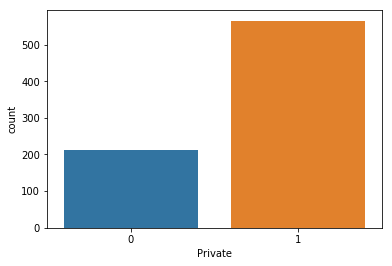

In [90]:
# lets get the frequency of different college types
sns.countplot(college_df['Private'],label="Count")
plt.show()

In [91]:
pred_columns = college_df[:]
pred_columns.drop(['Private'],axis=1,inplace=True)
prediction_var = pred_columns.columns
print(list(prediction_var))

['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']


/usr/local/anaconda/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [92]:
#now split our data into train and test
train, test = train_test_split(college_df, test_size = 0.2)
# we can check their dimension
print(train.shape)
print(test.shape)

(621, 18)
(156, 18)


In [93]:
train_X = train[prediction_var]# taking the training data input
train_y= train['Private']# This is output of our training data
test_X= test[prediction_var] # taking test data inputs
test_y =test['Private']   #output value of test dat

In [94]:
model = svm.SVC(kernel='linear')
model.fit(train_X,train_y)
#Predict Output
predicted= model.predict(test_X)
print("SVM accuray:",accuracy_score(test_y, predicted))

SVM accuray: 0.9423076923076923


In [96]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X2 = sc.fit_transform(train_X)
test_X2 = sc.fit_transform(test_X)

In [97]:
model.fit(train_X2,train_y)
#Predict Output
predicted= model.predict(test_X2)
print("SVM accuray:",accuracy_score(test_y, predicted))

SVM accuray: 0.9551282051282052


### Hyperparameter - Grid Search

In [113]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.1, 0.5,1.5,10], 
              'gamma': [1e-10, 1e-9, 1e-7, 1e-4]}

svr = svm.SVC(kernel = 'poly')
clf = GridSearchCV(svr, parameters)
clf.fit(train_X2,train_y)
clf.best_params_

{'C': 0.1, 'gamma': 1e-10}

In [114]:
predicted3 = clf.predict(test_X2)
print("SVM accuray:",accuracy_score(test_y, predicted3))

SVM accuray: 0.7115384615384616
